#PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##PENGECEKAN DATA NULL & DUPLICATE

In [ ]:
#load data awal yang belum dibersihkan
df = pd.read_csv("/content/data_bmkg.csv")
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,"22,6","32,6","27,2",86.0,3,"5,1",3.0,180.0,0.0,S
1,01-01-2014,"23,4","31,4",26,88.0,6,"3,2",2.0,90.0,0.0,S
2,01-01-2015,"23,4","31,2","28,9",74.0,"20,9","6,1",4.0,120.0,3.0,SE
3,01-01-2016,"22,4",32,29,70.0,NaN,"8,9",5.0,100.0,4.0,E
4,01-01-2017,"24,4","30,4","28,2",79.0,NaN,"7,6",4.0,130.0,2.0,SE


In [ ]:
# Checking for duplicates

print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 0


In [ ]:
#cek data yang NULL
df.isnull().sum()

Tanggal       0
Tn           75
Tx           53
Tavg         13
RH_avg       13
RR         1134
ss           48
ff_x         13
ddd_x        13
ff_avg       13
ddd_car      13
dtype: int64

In [ ]:
# Menampilkan nilai unik dalam kolom 'ddd_car' beserta jumlah kemunculannya
print(df['ddd_car'].value_counts())

ddd_car
SE    1568
S      739
N      614
NW     403
SW     257
E      196
C      107
W      101
NE      19
Name: count, dtype: int64


In [ ]:
# Menghilangkan spasi tambahan dari nilai dalam kolom 'ddd_car'
df['ddd_car'] = df['ddd_car'].str.strip()

# Memastikan nilai cocok dengan kunci dalam kamus penggantian
# Mungkin perlu mengevaluasi dan memperbarui kamus penggantian jika diperlukan
replace_dict = {'SE' : 0, 'S' : 1, 'N': 2, 'NW': 3, 'SW': 4, 'E': 5, 'C': 6, 'W': 7, 'NE': 8}
invalid_values = [value for value in df['ddd_car'] if value not in replace_dict.keys()]
print("Nilai yang tidak cocok dengan kunci dalam kamus penggantian:", invalid_values)

# Melakukan penggantian nilai berdasarkan kamus penggantian
df['ddd_car'].replace(replace_dict, inplace=True)


Nilai yang tidak cocok dengan kunci dalam kamus penggantian: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
# Menampilkan nilai unik dalam kolom 'ddd_car' beserta jumlah kemunculannya

print(df['ddd_car'].value_counts())

ddd_car
0.0    1568
1.0     739
2.0     614
3.0     403
4.0     257
5.0     196
6.0     107
7.0     101
8.0      19
Name: count, dtype: int64


In [ ]:
  # Menghapus nilai-nilai NaN
  df['ddd_car'].fillna(0, inplace=True)  # Mengganti NaN dengan 0

  # Mengonversi nilai float menjadi integer
  df['ddd_car'] = df['ddd_car'].astype(int)



In [ ]:
# Menampilkan nilai unik dalam kolom 'ddd_car' beserta jumlah kemunculannya

print(df['ddd_car'].value_counts())

ddd_car
0    1581
1     739
2     614
3     403
4     257
5     196
6     107
7     101
8      19
Name: count, dtype: int64


In [ ]:
updated_df = df
# Mengganti nilai non-numerik dengan NaN
updated_df['Tn'] = pd.to_numeric(updated_df['Tn'], errors='coerce')
updated_df['Tx'] = pd.to_numeric(updated_df['Tx'], errors='coerce')
updated_df['Tavg'] = pd.to_numeric(updated_df['Tavg'], errors='coerce')
updated_df['RH_avg'] = pd.to_numeric(updated_df['RH_avg'], errors='coerce')
updated_df['RR'] = pd.to_numeric(updated_df['RR'], errors='coerce')
updated_df['ss'] = pd.to_numeric(updated_df['ss'], errors='coerce')
updated_df['ff_x'] = pd.to_numeric(updated_df['ff_x'], errors='coerce')
updated_df['ddd_x'] = pd.to_numeric(updated_df['ddd_x'], errors='coerce')
updated_df['ff_avg'] = pd.to_numeric(updated_df['ff_avg'], errors='coerce')
updated_df['ddd_car'] = pd.to_numeric(updated_df['ddd_car'], errors='coerce')

# Mengisi nilai-nilai NaN dengan rata-rata
updated_df['Tn'] = updated_df['Tn'].fillna(updated_df['Tn'].mean())
updated_df['Tx'] = updated_df['Tx'].fillna(updated_df['Tx'].mean())
updated_df['Tavg'] = updated_df['Tavg'].fillna(updated_df['Tavg'].mean())
updated_df['RH_avg'] = updated_df['RH_avg'].fillna(updated_df['RH_avg'].mean())
updated_df['RR'] = updated_df['RR'].fillna(updated_df['RR'].mean())
updated_df['ss'] = updated_df['ss'].fillna(updated_df['ss'].mean())
updated_df['ff_x'] = updated_df['ff_x'].fillna(updated_df['ff_x'].mean())
updated_df['ddd_x'] = updated_df['ddd_x'].fillna(updated_df['ddd_x'].mean())
updated_df['ff_avg'] = updated_df['ff_avg'].fillna(updated_df['ff_avg'].mean())
updated_df['ddd_car'] = updated_df['ddd_car'].fillna(updated_df['ddd_car'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  4017 non-null   object 
 1   Tn       4017 non-null   float64
 2   Tx       4017 non-null   float64
 3   Tavg     4017 non-null   float64
 4   RH_avg   4017 non-null   float64
 5   RR       4017 non-null   float64
 6   ss       4017 non-null   float64
 7   ff_x     4017 non-null   float64
 8   ddd_x    4017 non-null   float64
 9   ff_avg   4017 non-null   float64
 10  ddd_car  4017 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 345.3+ KB


In [ ]:
df.iloc[:, :11].describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
count,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000
mean,23.260454,32.458283,28.458438,75.771728,2.847842,3.788732,4.138611,210.024476,1.797702,1.664177
std,0.443866,0.737328,0.497645,9.194221,5.466585,1.354908,1.381263,92.375276,0.853593,1.914896
min,19.000000,26.000000,24.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.260454,32.458283,28.458438,70.000000,0.000000,3.788732,3.000000,130.000000,1.000000,0.000000
50%,23.260454,32.458283,28.458438,76.000000,2.847842,3.788732,4.000000,180.000000,2.000000,1.000000
75%,23.260454,32.458283,28.458438,82.000000,2.847842,3.788732,5.000000,310.000000,2.000000,3.000000
max,27.000000,36.000000,32.000000,100.000000,102.000000,11.000000,16.000000,360.000000,6.000000,8.000000


In [ ]:
  df['ff_x'] = df['ff_x'].astype(int)

ff_x
4     1305
3     1125
5      840
6      279
2      251
8       86
7       83
9       20
10      13
0        9
11       3
12       2
16       1
Name: count, dtype: int64 




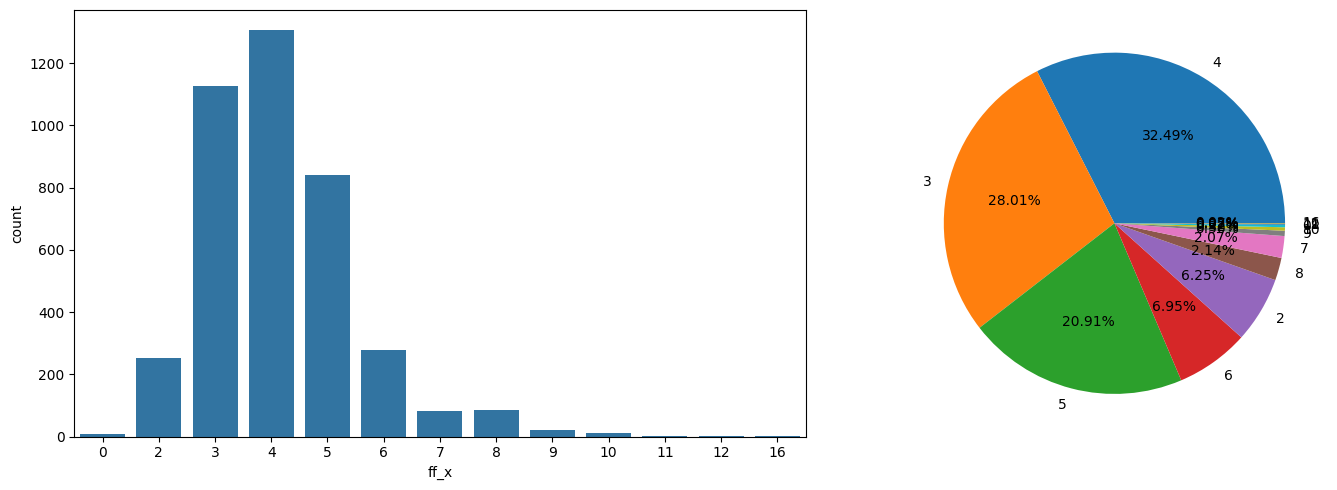

In [ ]:
target  = "ff_x"

val_counts = df[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = df[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [ ]:
df['ff_x'].unique()

array([ 3,  2,  4,  5,  9,  8,  6, 11,  0,  7, 10, 16, 12])

In [ ]:
len(df)

4017

In [ ]:
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,23.260454,32.458283,28.458438,86.0,3.000000,3.788732,3,180.0,0.0,1
1,01-01-2014,23.260454,32.458283,26.000000,88.0,6.000000,3.788732,2,90.0,0.0,1
2,01-01-2015,23.260454,32.458283,28.458438,74.0,2.847842,3.788732,4,120.0,3.0,0
3,01-01-2016,23.260454,32.000000,29.000000,70.0,2.847842,3.788732,5,100.0,4.0,5
4,01-01-2017,23.260454,32.458283,28.458438,79.0,2.847842,3.788732,4,130.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4012,31-12-2019,23.260454,32.000000,28.458438,73.0,1.000000,3.788732,4,120.0,3.0,0
4013,31-12-2020,23.260454,32.458283,28.458438,74.0,2.847842,3.788732,5,130.0,3.0,0
4014,31-12-2021,23.260454,32.458283,28.458438,90.0,2.847842,3.788732,5,140.0,3.0,0
4015,31-12-2022,23.260454,31.000000,28.458438,74.0,2.847842,3.788732,3,140.0,2.0,0


##REGRESI

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import joblib
from google.colab import files
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Memisahkan fitur dan target
X = df[['Tavg', 'RH_avg']]
Y = df['ff_x']
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2, random_state=25)

# Menampilkan hasil
print("Data Fitur (X):")
print(X.head())

print("\nData Target (Y):")
print(Y.head())

Data Fitur (X):
        Tavg  RH_avg
0  28.458438    86.0
1  26.000000    88.0
2  28.458438    74.0
3  29.000000    70.0
4  28.458438    79.0

Data Target (Y):
0    3
1    2
2    4
3    5
4    4
Name: ff_x, dtype: int64


In [ ]:
# Tulis di sini
print("Ukuran training dan testing data")
print("Training Datasest: ", X_train.shape, y_train.shape) #80% dari training data
print("testing dataset: ", X_test.shape, y_test.shape) #20% testing datanya

Ukuran training dan testing data
Training Datasest:  (3213, 2) (3213,)
testing dataset:  (804, 2) (804,)


In [ ]:
# Tulis di sini
LinearReg = LinearRegression().fit(X_train, y_train) #Training model regresi Linier

LassoReg = Lasso(alpha=0.1).fit(X_train, y_train) #training model Lasso

RidgeReg= Ridge(alpha=0.1).fit(X_train, y_train) #Training model Ridge

DTReg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train) #training model decision tree regression


In [ ]:
# Tulis di sini
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [ ]:
# Tulis di sini
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linier =  1.8145102937461377
Nilai MSE data testing Regresi Linier =  1.7196485690841798 

Nilai MSE data training Regresi Lasso =  1.8146798831351911
Nilai MSE data testing Regresi Lasso =  1.719837192451963 

Nilai MSE data training Regresi Ridge =  1.814510293747214
Nilai MSE data testing Regresi Ridge =  1.719648665340928 

Nilai MSE data training Regresi DTR =  1.7067077006288771
Nilai MSE data testing Regresi DTR =  1.7685598838449395 



###Evaluasi


In [ ]:
# Tulis di sini
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score DT: {DTReg.score(X, Y)}')



R^2 score Regresi Linier: 0.058689879724736715
R^2 score Regresi Lasso: 0.05859897462976371
R^2 score Regresi Ridge: 0.058689869624155344
R^2 score DT: 0.09876195306322988


In [ ]:
# Menyimpan model menggunakan joblib dengan ekstensi .model
model_filename = 'windprediction_DTReg.pkl'
joblib.dump(DTReg, model_filename)

print(f'Model berhasil disimpan di {model_filename}')

Model berhasil disimpan di windprediction_DTReg.pkl
